In [1]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

#### Tworzenie katalogów oraz zbiorów: treningowych, testowych, validacyjnych 

In [6]:
directory_train = "train_data"
directory_val = "vaildation_data"
directory_test = "test_data"

In [7]:
dirs = "C:/Users/Grzegorz Mróz/Desktop/data"

In [8]:
# tworzenie katalogów train, vali, test
path_1 = os.path.join(dirs, directory_train)
os.mkdir(path_1)
path_2 = os.path.join(dirs, directory_val)
os.mkdir(path_2)
path_3 = os.path.join(dirs, directory_test)
os.mkdir(path_3)

In [10]:
list_dir = ["0","A","B","C"]

In [11]:
## tworzenie podkatalogów z nazwami klasy 
for link, folders, files in os.walk(dirs):
    for folder in folders:
        if folder.endswith("data"):
            name_path = os.path.join(link, folder)
            for i in list_dir:
                path = os.path.join(name_path, i)
                os.mkdir(path)                               

In [13]:
import shutil

In [14]:
## kopiowanie obrazów do odpowiednich podkatalogów (80%- train, 10%-vali, 10%-test)
# 300 * 0,8 = 240 train_set
# 30 - vali_set
# 30 - test_set
for i in range(240):    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/0/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/train_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/A/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/train_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/B/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/train_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/C/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/train_data/C"
    shutil.copy(src, des)

In [15]:
for i in range(240,270):
    src = "C:/Users/Grzegorz Mróz/Desktop/data/0/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/vaildation_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/A/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/vaildation_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/B/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/vaildation_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/C/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/vaildation_data/C"
    shutil.copy(src, des)

In [16]:
for i in range(270,300):
    src = "C:/Users/Grzegorz Mróz/Desktop/data/0/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/test_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/A/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/test_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/B/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/test_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/Grzegorz Mróz/Desktop/data/C/"+str(i)+".jpg"
    des = "C:/Users/Grzegorz Mróz/Desktop/data/test_data/C"
    shutil.copy(src, des)

In [3]:
#ścieżki do katalogów
train_dir = "C:/Users/Grzegorz Mróz/Desktop/data/train_data"
vali_dir = "C:/Users/Grzegorz Mróz/Desktop/data/vaildation_data"
test_dir = "C:/Users/Grzegorz Mróz/Desktop/data/test_data"


#### augmentacja z pomocą funkcji w kerasie ImageDataGenerator, zbiór testowy musi zostać orginalny

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # skalowanie danych
    rotation_range =40, # losowy obrót obrazu w zakresie 0-180 st.
    width_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, poziom
    height_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, pion
    shear_range=0.2,# zakres losowego przycinania obrazu
    zoom_range=0.2,# zakres losowego przyblizania fragmentów obrazu
    horizontal_flip=True,# losowe odbicie połowy obrazu w poziomie
    fill_mode= 'nearest' # wypełnienie nowo powstałych pikseli, przez obród lub przesuniecie
)
test_datagen = ImageDataGenerator(rescale=1./255)

#### na postawie dnaych z geratora używam funcji która wyszykuje klasy i nadaje etykiety na podstawie katalogów

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # katalog do przeskalowania
    target_size=(150,150), #zmienia rozdzielczość obrazów 150x150
    batch_size=20, # rozmiar grupy wsadu
    class_mode='categorical' # problem klasyfikacji wieloklasowej (one hot encoder)
)

Found 960 images belonging to 4 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
    vali_dir,
    target_size=(150,150), 
    batch_size=20,
    class_mode='categorical'
)

Found 120 images belonging to 4 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    vali_dir, 
    target_size=(150,150), 
    batch_size=120,
    class_mode='categorical'
)

Found 120 images belonging to 4 classes.


In [8]:
for target, label in train_generator:
    print("kształt danych:",target.shape)
    print("kształt labelek:",label.shape)
    break

##generator zwaraca w nieskończoność wsady danych i ich etykiety dlatego trzeba używać "break"!

kształt danych: (20, 150, 150, 3)
kształt labelek: (20, 4)


#### Układam sieć z danymi wejściowymi zgodymi z przetworzonymi przez generator 

In [9]:
from keras import Sequential
from keras import layers

In [10]:
# sieć zawiera warstwy konwolucyjne, wartswe flatten i jedną Gestą jak w poleceniu 
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # w celu zmniejszenia ovefitigu  
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
from keras import optimizers

In [12]:
## kompilowanie modelu, ustawianie: funkcji straty, learning reatu = 0.0001 i metryki jak w poleceniu
model.compile(loss="categorical_crossentropy",
             optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [13]:
history = model.fit(train_generator, epochs=70, validation_data=validation_generator)

model.save("alfatbet_braille_'a.h5")# zapisywanie modelu 

Epoch 1/70
48/48 [==============================] - 17s 330ms/step - loss: 1.2298 - acc: 0.4521 - val_loss: 0.9045 - val_acc: 0.7083
Epoch 2/70
48/48 [==============================] - 15s 314ms/step - loss: 0.8194 - acc: 0.6750 - val_loss: 0.7802 - val_acc: 0.5083
Epoch 3/70
48/48 [==============================] - 15s 310ms/step - loss: 0.6124 - acc: 0.7573 - val_loss: 0.5817 - val_acc: 0.5667
Epoch 4/70
48/48 [==============================] - 15s 307ms/step - loss: 0.5393 - acc: 0.7792 - val_loss: 0.8958 - val_acc: 0.6000
Epoch 5/70
48/48 [==============================] - 15s 306ms/step - loss: 0.4963 - acc: 0.8177 - val_loss: 0.4135 - val_acc: 0.7750
Epoch 6/70
48/48 [==============================] - 15s 305ms/step - loss: 0.3867 - acc: 0.8521 - val_loss: 0.8811 - val_acc: 0.7500
Epoch 7/70
48/48 [==============================] - 15s 306ms/step - loss: 0.3962 - acc: 0.8510 - val_loss: 0.3218 - val_acc: 0.9583
Epoch 8/70
48/48 [==============================] - 15s 305ms/step - 

In [14]:
import matplotlib.pyplot as plt

#### wizualizacja trenowania przy uwzględnieniu stary walidacji i dokładności walidacji 

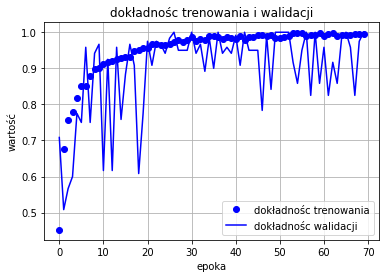

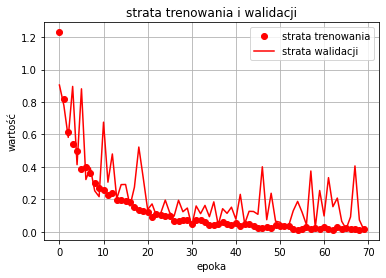

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = "dokładnośc trenowania")
plt.plot(epochs, val_acc, 'b', label = "dokładnośc walidacji")
plt.title("dokładnośc trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'ro', label = "strata trenowania")
plt.plot(epochs, val_loss, 'r', label = "strata walidacji")
plt.title("strata trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()

plt.show()

#### Mierzenie dokładności i sprawdzanie predykcji modelu 

In [16]:
import numpy as np
from keras import metrics

In [18]:
evaluate = model.evaluate(test_generator)
print("dokładność modelu na zbiorze testowym:", evaluate)

1/1 [==============================] - 0s 499ms/step - loss: 0.0136 - acc: 1.0000
dokładność modelu na zbiorze testowym: [0.01358509436249733, 1.0]


In [19]:
# klasy z odpowiednimi labelkami 
class_img = train_generator.class_indices
class_img

{'0': 0, 'A': 1, 'B': 2, 'C': 3}

1/1 [==============================] - 0s 492ms/step
przewidywana klasa nr: 2


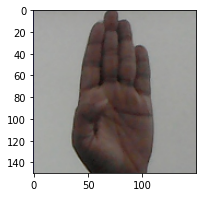

przewidywana klasa nr: 0


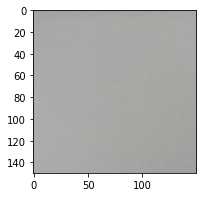

przewidywana klasa nr: 3


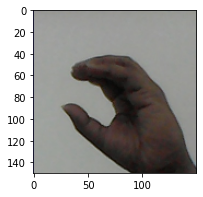

przewidywana klasa nr: 0


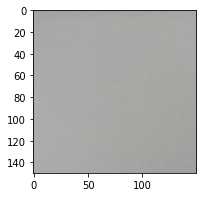

przewidywana klasa nr: 3


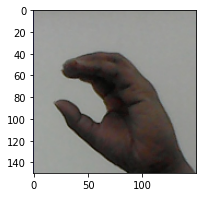

przewidywana klasa nr: 1


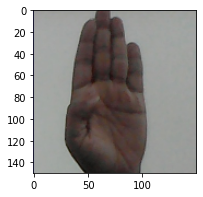

przewidywana klasa nr: 1


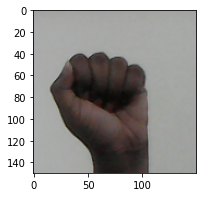

przewidywana klasa nr: 1


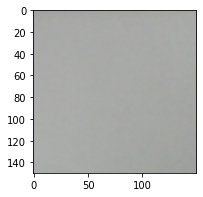

przewidywana klasa nr: 3


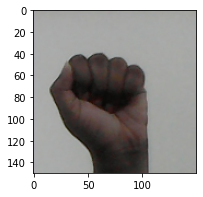

przewidywana klasa nr: 2


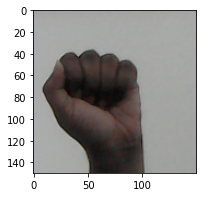

1/1 [==============================] - 1s 511ms/step


In [31]:
# przewidywania modelu 
prediction = model.predict(test_generator)
prediction = np.argmax(prediction, axis=1)
# przewidywanie pierwszych 10 klas
label_prediction =prediction[:10]
label_prediction

# wizualizacji predykcji pierwszych 10 klas
for nr in label_prediction:
    plt.figure(figsize=(3,3))
    target, label = test_generator.next()
    print("przewidywana klasa nr:",nr)
    plt.imshow(target[0])
    plt.show()

    
## średnie wyniyki :(
test = np.argmax(test_generator.labels) 
#matrix = confusion_matrix(test_generator.labels, y_prediction , normalize='pred')
prediction_ = model.predict(test_generator, label)

In [30]:
# przewiduje że pierwszy przykład należy do klasy 2, drugi do 3 itd.
prediction

array([2, 3, 3, 1, 0, 0, 2, 1, 2, 3, 1, 1, 2, 2, 3, 1, 3, 1, 3, 0, 1, 3,
       3, 1, 2, 0, 1, 1, 2, 2, 3, 0, 0, 0, 0, 1, 1, 1, 0, 3, 2, 1, 3, 0,
       3, 2, 3, 1, 2, 0, 3, 3, 2, 2, 1, 3, 2, 3, 0, 3, 3, 2, 3, 1, 1, 2,
       3, 3, 2, 1, 0, 2, 0, 1, 0, 1, 0, 3, 0, 2, 1, 2, 3, 2, 1, 2, 0, 1,
       3, 2, 0, 2, 3, 1, 2, 2, 3, 0, 2, 3, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 1, 0, 0, 3, 3], dtype=int64)

[0. 0. 1. 0.]


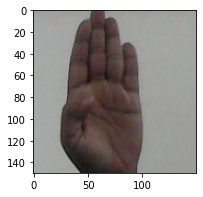

[0. 0. 0. 1.]


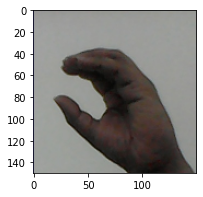

[0. 1. 0. 0.]


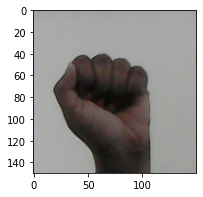

[1. 0. 0. 0.]


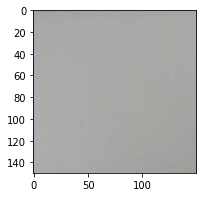

[0. 0. 1. 0.]


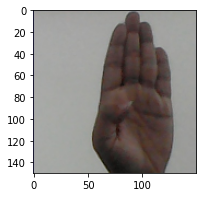

[0. 1. 0. 0.]


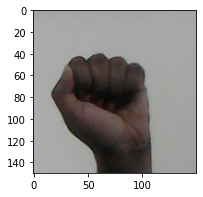

[0. 1. 0. 0.]


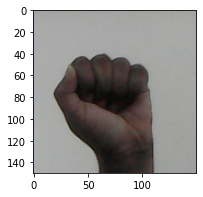

[0. 1. 0. 0.]


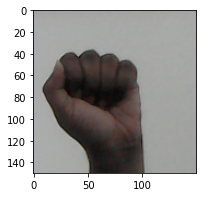

[1. 0. 0. 0.]


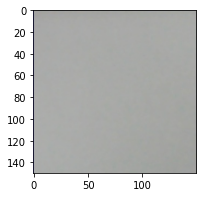

In [39]:
## wyświetlanie obrazów i labelek w formie One Hot Encoder 
for kn in range(9):
    plt.figure(figsize=(3,3))
    target, label = test_generator.next()
    print(label[0]) 
    plt.imshow(target[0])
    plt.show()

In [33]:
from keras.utils import to_categorical

In [34]:
for target,label in test_generator:
    to_predict_label = np.array(label)
    break

In [35]:
# precision i recall oczekują tych samych danych wejściowych dlatego sprwadzam predykcje do One Hot Encoder
category = to_categorical(prediction,num_classes=4)

In [36]:
precision = keras.metrics.Precision()
precision.update_state(to_predict_label, category)
precision = precision.result().numpy()
precision

0.25

In [37]:
recall = keras.metrics.Recall()
recall.update_state(to_predict_label, category)
recall = recall.result().numpy()
recall

0.25

In [38]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.25

In [301]:
# źródła: 
# Ksiązka Uczenie maszynowe z użyciem Scikit-Learn i TnesorFlow (Aurelien Geron) 
# Ksiażka Deep Learnig praca z biblioteką Keras (Francois Chollet)
# Dokumentacja TensorFlow i Keras 
# Czasami Stackoverflow (best friend  <3)